#**Dealing-with-Missing-Data**

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv(r'/content/Ames_Housing_Data.csv')
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [129]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


**Removing the PID**

As we already have Index and PID is another index, so we will drop it.

In [130]:
df.drop('PID',axis=1,inplace=True)

In [131]:
len(df.columns)

80

**Observing NaN Features**

In [132]:
df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [133]:
df.isnull().sum().sum()

np.int64(15749)

**we want to know what percentage % of data is missing rather than # of rows missing**

In [134]:
#Column wise percentage of null
nan = (df.isnull().sum()/ len(df)).reset_index()
nan.columns = ['column_name','percent_missing']
nan.sort_values(by='percent_missing',ascending=False)

,column_name,percent_missing
71,Pool QC,0.995563
73,Misc Feature,0.963823
5,Alley,0.932423
72,Fence,0.804778
24,Mas Vnr Type,0.605802
...,...,...
75,Mo Sold,0.000000
76,Yr Sold,0.000000
77,Sale Type,0.000000
78,Sale Condition,0.000000


In [135]:
# Nearly 5% of data has null values from overall data

(df.isnull().sum().sum()/ len(df))

np.float64(5.3750853242320815)

In [136]:
#Column wise percentage of null
def percent_missing(df):
  percent_nan = 100 * (df.isnull().sum()/len(df))
  percent_nan = percent_nan[percent_nan > 0].sort_values(ascending = False)
  return percent_nan

In [137]:
percent_nan = percent_missing(df)
percent_nan

,0
Pool QC,99.556314
Misc Feature,96.382253
Alley,93.242321
Fence,80.477816
Mas Vnr Type,60.580205
Fireplace Qu,48.532423
Lot Frontage,16.723549
Garage Qual,5.426621
Garage Cond,5.426621
Garage Yr Blt,5.426621


As we can see from the above summary, Pool QC is missing 99% of the data. It maybe because data wasn't collected. Or missing value means indicator of no pool on that house. So we may need to read the description text to clarify this.

Now we have the summary of missing %, we can visualize this info.

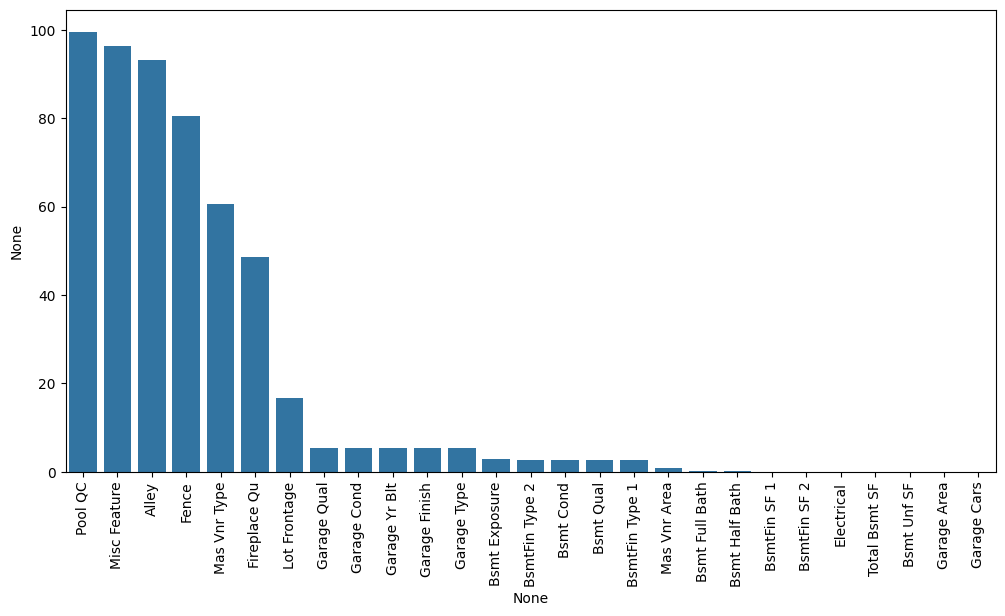

In [138]:
plt.figure(figsize=(12,6))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.show()

**1)Removing Features or Removing Rows**

If only a few rows relative to the size of your dataset are missing some values, then it might just be a good idea to drop those rows. What does this cost you in terms of performace? It essentialy removes potential training/testing data, but if its only a few rows, its unlikely to change performance.

Sometimes it is a good idea to remove a feature entirely if it has too many null values. However, you should carefully consider why it has so many null values, in certain situations null could just be used as a separate category.

Take for example a feature column for the number of cars that can fit into a garage. Perhaps if there is no garage then there is a null value, instead of a zero. It probably makes more sense to quickly fill the null values in this case with a zero instead of a null. Only you can decide based off your domain expertise and knowledge of the data set!

**Working based on Rows Missing Data
Filling in Data or Dropping Data?**

Let's explore how to choose to remove or fill in missing data for rows that are missing some data. Let's choose some threshold where we decide it is ok to drop a row if its missing some data (instead of attempting to fill in that missing data point). We will choose 1% as our threshold. This means if less than 1% of the rows are missing this feature, we will consider just dropping that row, instead of dealing with the feature itself. There is no right answer here, just use common sense and your domain knowledge of the dataset, obviously you don't want to drop a very high threshold like 50% , you should also explore correlation to the dataset, maybe it makes sense to drop the feature instead.

Based on the text description of the features, you will see that most of this missing data is actually NaN on purpose as a placeholder for 0 or "none".

#**1.1) Example of Filling in Data : Basement Columns**

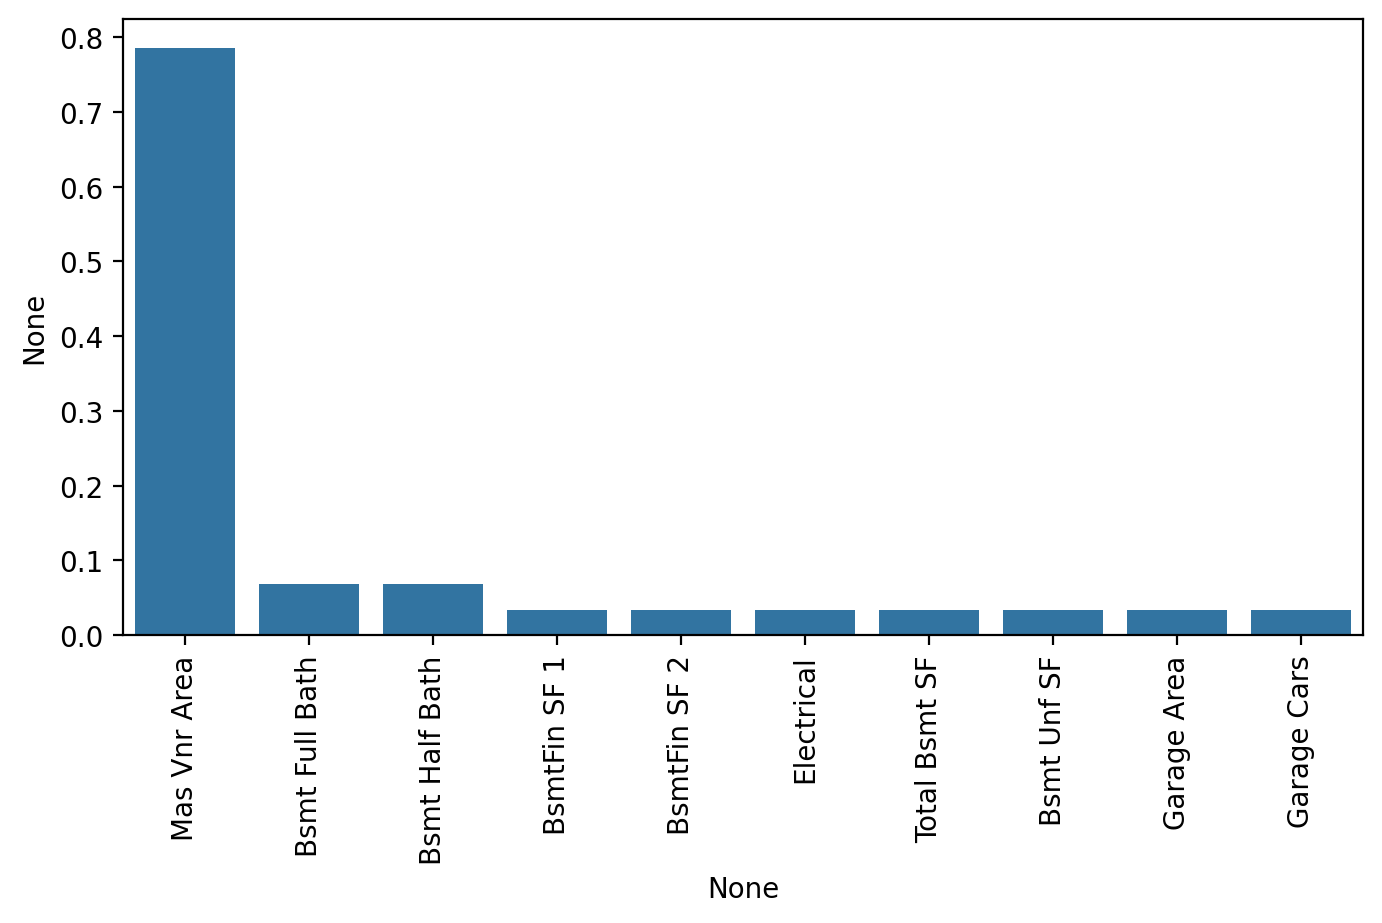

In [139]:
y=percent_nan[percent_nan <= 1]
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=y.index, y=y)
plt.xticks(rotation=90);


So Let's check which row is missing Electrial value.

In [140]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [141]:
df[df['Electrical'].isnull()]['Garage Area']

,Garage Area
1577,400.0


In [142]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


When we consider which rows to drop, we need to consider from least amount of missing rows to higher one. In this case from all the way from Electrical (least) to Mas Vnr Type (most missing)

In [143]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


**1.1.2) Filling in data based on column names. There are 2 types of basement features, numerical and string descriptives.**

If we refer back to the text description, N/A for basement means no basement at all. So we can assign 0 for those houses.

**Numerical Basement Columns => fill with 0**

In [144]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

String Basement Columns => fill with None string

In [145]:
bstm_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
for col in bstm_str_cols:
  df[col] = df[col].fillna('None')

In [146]:
# recalculate percent missing
percent_nan = percent_missing(df)

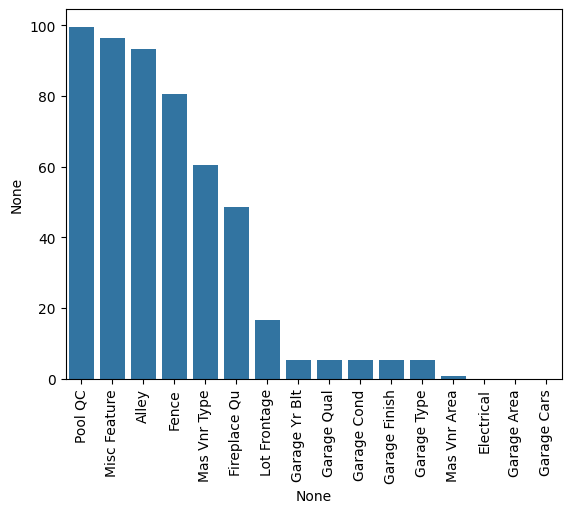

In [147]:
sns.barplot(x = percent_nan.index,y  = percent_nan)
plt.xticks(rotation = 90)
plt.show()

#**1.2) Dropping Rows**

If there is a need to drop rows based on the missing columns features

In [148]:
# only consider missing values in the columns specified within this list.

df = df.dropna(axis = 0, subset=['Electrical','Garage Cars'])

In [149]:
percent_nan = percent_missing(df)

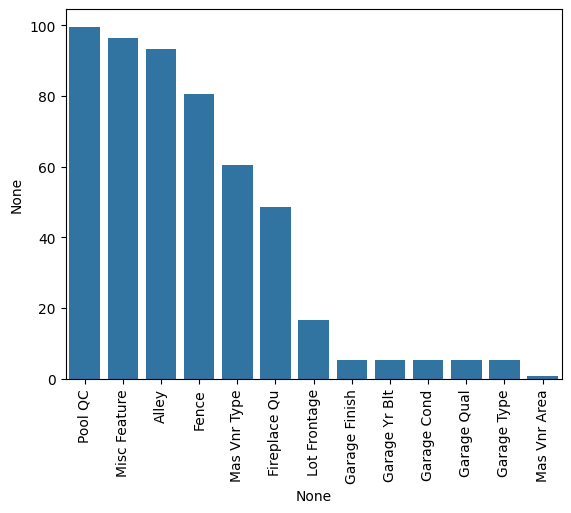

In [150]:
sns.barplot(x = percent_nan.index,y  = percent_nan)
plt.xticks(rotation = 90)
plt.show()

**Mas Vnr Feature**
For Mas Var, we will fill in 0 and None accordingly too.

In [151]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [152]:
percent_nan = percent_missing(df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Pool QC'),
  Text(1, 0, 'Misc Feature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'Fireplace Qu'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Garage Yr Blt'),
  Text(7, 0, 'Garage Finish'),
  Text(8, 0, 'Garage Qual'),
  Text(9, 0, 'Garage Cond'),
  Text(10, 0, 'Garage Type')])

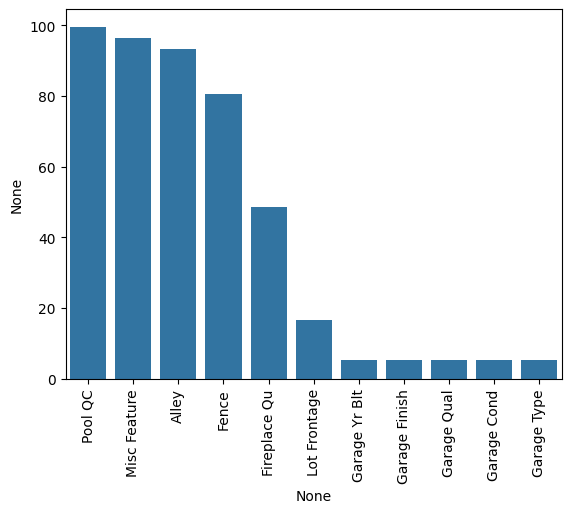

In [153]:
sns.barplot(x = percent_nan.index,y = percent_nan)
plt.xticks(rotation = 90)

**2) Features Columns**

There are two ways to handle that.

1. dropping feature column (if there are too many NaN values. However we need to be mindful of impact on dropping this feature column)
2. missing fill column values (potentially change the ground truth in data, must decide on resonable estimation to fill data, must apply transformation to all future data for predictions).

**2.1) Filling In Missing Column Data**

**Garage Columns**
As we can see the chart that Garage related columns have missing values too. Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.

In [154]:
gar_str_columns = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
for col in gar_str_columns:
  df[col] = df[col].fillna('None')

/tmp/ipython-input-154-1094925141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna('None')


In [155]:
percent_nan = percent_missing(df)

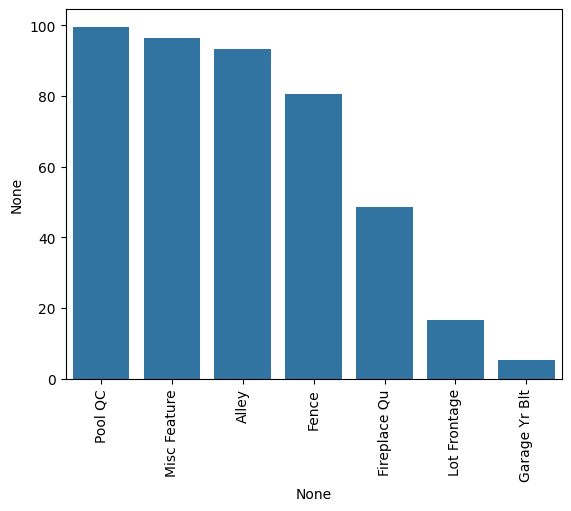

In [156]:
sns.barplot(x = percent_nan.index,y = percent_nan)
plt.xticks(rotation = 90)
plt.show()

For the rows where there is no Garage, we need to fill somethig to Garage Yr Blt too.

In [157]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

/tmp/ipython-input-157-1710577415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)


In [158]:
percent_nan = percent_missing(df)

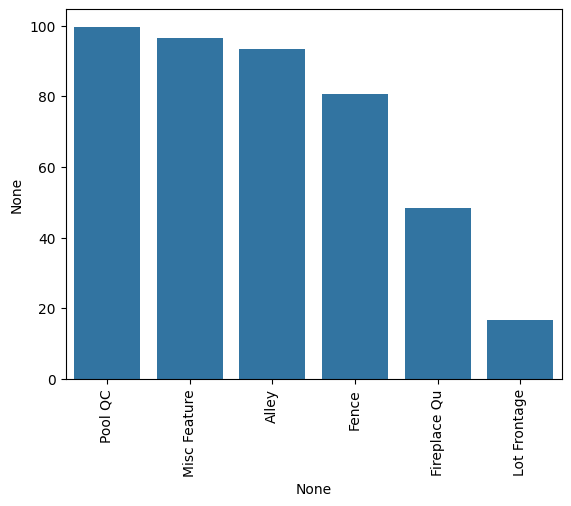

In [159]:
sns.barplot(x = percent_nan.index,y = percent_nan)
plt.xticks(rotation = 90)
plt.show()

**2.2) Dropping Feature Columns**

Sometimes you may want to take the approach that above a certain missing percentage threshold, you will simply remove the feature from all the data. For example if 99% of rows are missing a feature, it will not be predictive, since almost all the data does not have any value for it. In our particular data set, many of these high percentage NaN features are actually plasceholders for "none" or 0. But for the sake of showing variations on dealing with missing data, we will remove these features, instead of filling them in with the appropriate value.

In [160]:
percent_nan.index

Index(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
       'Lot Frontage'],
      dtype='object')

In [162]:
df = df.drop(['Fence', 'Alley', 'Misc Feature', 'Pool QC'],axis=1)

In [163]:
percent_nan = percent_missing(df)

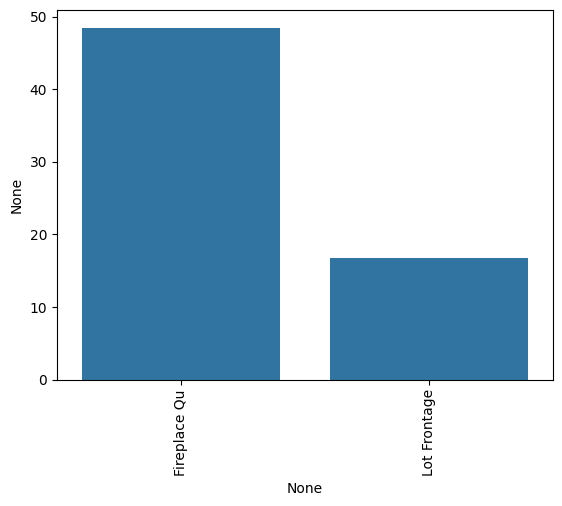

In [164]:
sns.barplot(x = percent_nan.index,y = percent_nan)
plt.xticks(rotation = 90)
plt.show()

Now we are only left with 2 columns with missing values.

Fireplace Qu

In [165]:
df['Fireplace Qu'].value_counts()

,count
Fireplace Qu,
Gd,744
TA,600
Fa,75
Po,46
Ex,43


As Fireplace Qu use string value, we can fill the missing rows with None.

In [166]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

Lot Frontage

In [167]:
df['Lot Frontage'].value_counts()

,count
Lot Frontage,
60.0,276
80.0,137
70.0,133
50.0,116
75.0,105
...,...
168.0,1
111.0,1
131.0,1


As Lot Frontage use num value, we can fill the missing rows with 0.

In [168]:
  df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

#**Imputation of Missing Data**
To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [169]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

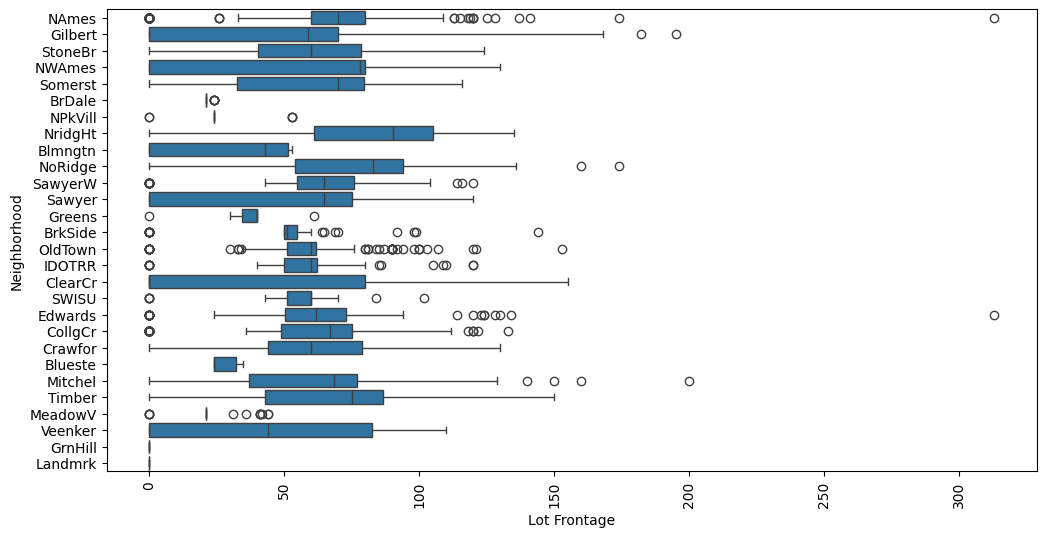

In [172]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Lot Frontage', y = 'Neighborhood', data = df,orient = 'h')
plt.xticks(rotation = 90)
plt.show()

#**Impute Missing Data based on other Features¶**

In [173]:
# get the mean of Lot Frontage for each Neighborhood
df.groupby('Neighborhood')['Lot Frontage'].mean()

,Lot Frontage
Neighborhood,
Blmngtn,33.500000
Blueste,27.300000
BrDale,21.500000
BrkSide,49.074074
ClearCr,40.068182
CollgCr,58.779026
Crawfor,56.368932
Edwards,61.391753
Gilbert,49.921212


then fill in those mean of Lot Frontage of that specific Neighborhood, if the missing Lot Frontage is belonged to that Neighborhood.

In [177]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x : x.fillna(x.mean()))

In [179]:
df.isnull().sum().sum()

np.int64(0)